In [2]:
from google.colab import files
import pandas as pd
uploaded = files.upload()


Saving tourist_accommodation_reviews.csv to tourist_accommodation_reviews.csv


In [3]:
import io

data = pd.read_csv(io.BytesIO(uploaded["tourist_accommodation_reviews.csv"]),encoding='cp1252')

data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [4]:
data.shape

(53644, 5)

In [5]:
data.isnull().any()

ID                       False
Review Date              False
Location                 False
Hotel/Restaurant name    False
Review                   False
dtype: bool

There are no missing values in our dataset.

We can look at the unique locations and restaurants.

In [6]:
import numpy as np
data_locations = data.Location.unique()
print(data_locations)
np.count_nonzero(data_locations)


[' Kathu' ' Kata Beach' ' Rawai' ' Choeng Thale' ' Karon Beach'
 ' Phuket Town' ' Patong' ' Mai Khao' ' Karon' ' Chalong' ' Nai Harn'
 ' Cape Panwa' ' Sakhu' ' Pa Khlok' ' Kamala' ' Bang Tao Beach'
 ' Thalang District' ' Talat Nuea' ' Kata Noi Beach' ' Wichit' ' Nai Yang'
 ' Talat Yai' ' Koh Kaew' ' Nai Thon' ' Ratsada']


25

In [7]:
data_restaurants = data["Hotel/Restaurant name"].unique()
print(data_restaurants)
np.count_nonzero(data_restaurants)

['Thong Dee The Kathu Brasserie' 'Odysseus Greek Organic Restaurant'
 'Green Tamarind Kitchen' 'Dee Plee - Anantara Layan Phuket Resort'
 'The Tavern' 'EAT. bar & grill' 'Surf and Turf by Soul Kitchen'
 'Siam Supper Club' "Sam's Steaks and Grill" 'Istanbul Turkish Restaurant'
 'The Corner Restaurant' 'Kataturk Turkish Restaurant'
 'Sala Sawasdee Lobby Bar' 'The Palm Cuisine'
 'Highway Curry Indian & Thai Cuisine' 'Tandoori Flames' 'Pad Thai Shop'
 'Golden Paradise Restaurant' 'Mr.Coffee' 'Flavor Phuket'
 'Baan Noy Restaurant' 'Ao Chalong Yacht Club Restaurant'
 "Naughty Nuri's Phuket" 'Surin Chill House'
 'Natural Efe Macrobiotic World' 'Honeymoon Thai Restaurant by Kenya'
 'O-OH Farm Ta-Eiad' 'Da Puccio Restaurant' 'Sizzle Rooftop Restaurant'
 "Benny's American Bar & Grill" 'Climax on Bangla' 'Le Brooklyn Patong'
 'La Dolce Vita Restaurant' 'Sabaijai Cafe' 'The Cove Phuket'
 'i-Kroon Cafe' "Ann's Kitchen Bar and Grill" 'Salute Italian Restaurant'
 'The Family Restaurant' 'Shameena Res

537

In [8]:
data["Location"].value_counts()

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64

In [9]:
data["Hotel/Restaurant name"].value_counts()

Da Mario                                             279
Sabai Sabai                                          200
No.6 Restaurant                                      200
The Pizza Company                                    198
The Family Restaurant                                196
                                                    ... 
Sultan's Grill Authentic Turkish & Indian Cuisine     91
Som Restaurant                                        91
Chez Nicolas                                          90
Dada Yura Restaurant                                  80
Chekhoff Restaurant and Bar                           30
Name: Hotel/Restaurant name, Length: 537, dtype: int64

In [10]:
data["Hotel/Restaurant name"].nunique()

537

We need to choose 30 restaurants from the list of 537 restaurants. 

We choose the 30 with the highest number of reviews.

In [11]:
restaurant_count = data.groupby(by = "Hotel/Restaurant name").size().reset_index(name="Frequency").sort_values(by="Frequency", ascending=False).head(30)
restaurant_count

,Hotel/Restaurant name,Frequency
110,Da Mario,279
298,No.6 Restaurant,200
383,Sabai Sabai,200
483,The Pizza Company,198
470,The Family Restaurant,196
314,Outdoor Restaurant,193
340,Poo Nurntong Restaurant,100
334,Pizzeria AGLI AMICI da Michele & Jimmy,100
336,Pizzeria Hut 1,100
337,Plum Prime Steakhouse,100


In [12]:

select_restaurants = restaurant_count["Hotel/Restaurant name"].to_list()
select_restaurants

['Da Mario',
 'No.6 Restaurant',
 'Sabai Sabai',
 'The Pizza Company',
 'The Family Restaurant',
 'Outdoor Restaurant',
 'Poo Nurntong Restaurant',
 'Pizzeria AGLI AMICI da Michele & Jimmy',
 'Pizzeria Hut 1',
 'Plum Prime Steakhouse',
 'Pomodoro Pizza Restaurant',
 'Mare Italian Restaurant',
 'Pooh and Friends',
 "Pim's Place",
 'Pure Vegan Heaven',
 "Rawai View Cafe' & Bar",
 'Raya Thai Cuisine',
 'Pum Thai Restaurant',
 "Phen's Restaurant Bar & Coffee",
 'Phuket La Ca Sa',
 'Red Chopsticks',
 'Pesto Restaurant',
 'Peony Cafe & Restaurant',
 'Patong Seafood',
 'Patong Corner Restaurant',
 'Papaya',
 'Panwa House',
 'Pan Yaah Thai Restaurant',
 'Pan Bistro',
 'Palm Square']

In [13]:
filtered_data = data[data["Hotel/Restaurant name"].isin(select_restaurants)]
filtered_data

,ID,Review Date,Location,Hotel/Restaurant name,Review
3769,rn581240214,Reviewed yesterday,Rawai,The Family Restaurant,I have been eating here for many years and the...
3770,rn573056196,"Reviewed April 13, 2018",Rawai,The Family Restaurant,"Great prices, superb friendly service and mega..."
3771,rn572373276,"Reviewed April 10, 2018",Rawai,The Family Restaurant,We had dinner at this restaurant several times...
3772,rn567470716,"Reviewed March 19, 2018",Rawai,The Family Restaurant,You could be in the Mediterranean!!! The exper...
3773,rn564981131,"Reviewed March 6, 2018",Rawai,The Family Restaurant,I have been eating here regularly for the last...
...,...,...,...,...,...
52655,rn403882083,"Reviewed August 10, 2016",Patong,Patong Seafood,Every time I visit Phuket I used to pass by th...
52656,rn401102476,"Reviewed August 3, 2016",Patong,Patong Seafood,Had my dinner last week with family. ordered f...
52657,rn397958097,"Reviewed July 27, 2016",Patong,Patong Seafood,After 27 years of dining at Patong Seafood I w...
52658,rn397866936,"Reviewed July 27, 2016",Patong,Patong Seafood,So damn over priced... We ordered a shrimp cur...


In [14]:
filtered_data["Hotel/Restaurant name"].value_counts()

Da Mario                                  279
No.6 Restaurant                           200
Sabai Sabai                               200
The Pizza Company                         198
The Family Restaurant                     196
Outdoor Restaurant                        193
Poo Nurntong Restaurant                   100
Raya Thai Cuisine                         100
Phuket La Ca Sa                           100
Mare Italian Restaurant                   100
Pomodoro Pizza Restaurant                 100
Pan Bistro                                100
Pim's Place                               100
Pan Yaah Thai Restaurant                  100
Red Chopsticks                            100
Pizzeria Hut 1                            100
Pizzeria AGLI AMICI da Michele & Jimmy    100
Panwa House                               100
Patong Corner Restaurant                  100
Pum Thai Restaurant                       100
Pooh and Friends                          100
Papaya                            

To prepare the data for analysis we need to remove any special characters and numbers.

In [15]:
def lower_case(data):
    data["Review"] = data["Review"].apply(lambda x: " ".join(x.lower() for x in x.split()))

lower_case(filtered_data)
filtered_data

<ipython-input-15-2e527023e0f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Review"] = data["Review"].apply(lambda x: " ".join(x.lower() for x in x.split()))


,ID,Review Date,Location,Hotel/Restaurant name,Review
3769,rn581240214,Reviewed yesterday,Rawai,The Family Restaurant,i have been eating here for many years and the...
3770,rn573056196,"Reviewed April 13, 2018",Rawai,The Family Restaurant,"great prices, superb friendly service and mega..."
3771,rn572373276,"Reviewed April 10, 2018",Rawai,The Family Restaurant,we had dinner at this restaurant several times...
3772,rn567470716,"Reviewed March 19, 2018",Rawai,The Family Restaurant,you could be in the mediterranean!!! the exper...
3773,rn564981131,"Reviewed March 6, 2018",Rawai,The Family Restaurant,i have been eating here regularly for the last...
...,...,...,...,...,...
52655,rn403882083,"Reviewed August 10, 2016",Patong,Patong Seafood,every time i visit phuket i used to pass by th...
52656,rn401102476,"Reviewed August 3, 2016",Patong,Patong Seafood,had my dinner last week with family. ordered f...
52657,rn397958097,"Reviewed July 27, 2016",Patong,Patong Seafood,after 27 years of dining at patong seafood i w...
52658,rn397866936,"Reviewed July 27, 2016",Patong,Patong Seafood,so damn over priced... we ordered a shrimp cur...


In [16]:
import re

In [17]:
import sys
!{sys.executable} -m pip install unidecode
import unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 7.8 MB/s 


In [18]:
reviews = filtered_data["Review"].values.tolist()
reviews

['i have been eating here for many years and the food is always top quality. i prefer the israeli food, but the thai is also great. friendly staff. highly recommended.',
 'great prices, superb friendly service and mega delicious food! its a family business of a guy in his 60s and his wife. i really recommend this place and will definitely come back for more!! p.s - mediterranean, western and thai food.',
 'we had dinner at this restaurant several times and the food was great. the owner, ovadia, was a wonderful host',
 'you could be in the mediterranean!!! the experience is simply all round excellent! the menu is vast and varied and the food is delicious! the staff are very friendly and accommodating! the music is a bonus to the whole thing and the hallway to the...more',
 'i have been eating here regularly for the last 13 years. initially at the old location next to chalong circle and for many years now near lotus rawai. and i keep on coming back, taking family and friends. the food is

In [19]:
clean_data = []

for x in range(0, len(reviews)):
    clean = re.sub(r'\W', ' ', str(reviews[x]))
    clean = unidecode.unidecode(clean)
    clean = re.sub(r'\d+','', clean)
    clean_data.append(clean)

clean_data

['i have been eating here for many years and the food is always top quality  i prefer the israeli food  but the thai is also great  friendly staff  highly recommended ',
 'great prices  superb friendly service and mega delicious food  its a family business of a guy in his s and his wife  i really recommend this place and will definitely come back for more   p s   mediterranean  western and thai food ',
 'we had dinner at this restaurant several times and the food was great  the owner  ovadia  was a wonderful host',
 'you could be in the mediterranean    the experience is simply all round excellent  the menu is vast and varied and the food is delicious  the staff are very friendly and accommodating  the music is a bonus to the whole thing and the hallway to the   more',
 'i have been eating here regularly for the last  years  initially at the old location next to chalong circle and for many years now near lotus rawai  and i keep on coming back  taking family and friends  the food is gre

We now convert each review to a bag of words.

In [20]:
!{sys.executable} -m pip install gensim
import gensim
from gensim.utils import simple_preprocess

def to_bag(reviews):
    for x in reviews:
        yield(gensim.utils.simple_preprocess(str(x), deacc=True))

review_words = list(to_bag(clean_data))

review_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[['have',
  'been',
  'eating',
  'here',
  'for',
  'many',
  'years',
  'and',
  'the',
  'food',
  'is',
  'always',
  'top',
  'quality',
  'prefer',
  'the',
  'israeli',
  'food',
  'but',
  'the',
  'thai',
  'is',
  'also',
  'great',
  'friendly',
  'staff',
  'highly',
  'recommended'],
 ['great',
  'prices',
  'superb',
  'friendly',
  'service',
  'and',
  'mega',
  'delicious',
  'food',
  'its',
  'family',
  'business',
  'of',
  'guy',
  'in',
  'his',
  'and',
  'his',
  'wife',
  'really',
  'recommend',
  'this',
  'place',
  'and',
  'will',
  'definitely',
  'come',
  'back',
  'for',
  'more',
  'mediterranean',
  'western',
  'and',
  'thai',
  'food'],
 ['we',
  'had',
  'dinner',
  'at',
  'this',
  'restaurant',
  'several',
  'times',
  'and',
  'the',
  'food',
  'was',
  'great',
  'the',
  'owner',
  'ovadia',
  'was',
  'wonderful',
  'host'],
 ['you',
  'could',
  'be',
  'in',
  'the',
  'mediterranean',
  'the',
  'experience',
  'is',
  'simply',
  'a

In [21]:
len(review_words)

3666

Now that each review is a bag of words, we can remove stopwords.

In [22]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
def remove_stopwords(reviews):
    return [[word for word in simple_preprocess(str(x)) if word not in stop_words] 
            for x in reviews]

review_words_nostops = remove_stopwords(review_words)
review_words_nostops

[['eating',
  'many',
  'years',
  'food',
  'always',
  'top',
  'quality',
  'prefer',
  'israeli',
  'food',
  'thai',
  'also',
  'great',
  'friendly',
  'staff',
  'highly',
  'recommended'],
 ['great',
  'prices',
  'superb',
  'friendly',
  'service',
  'mega',
  'delicious',
  'food',
  'family',
  'business',
  'guy',
  'wife',
  'really',
  'recommend',
  'place',
  'definitely',
  'come',
  'back',
  'mediterranean',
  'western',
  'thai',
  'food'],
 ['dinner',
  'restaurant',
  'several',
  'times',
  'food',
  'great',
  'owner',
  'ovadia',
  'wonderful',
  'host'],
 ['could',
  'mediterranean',
  'experience',
  'simply',
  'round',
  'excellent',
  'menu',
  'vast',
  'varied',
  'food',
  'delicious',
  'staff',
  'friendly',
  'accommodating',
  'music',
  'bonus',
  'whole',
  'thing',
  'hallway'],
 ['eating',
  'regularly',
  'last',
  'years',
  'initially',
  'old',
  'location',
  'next',
  'chalong',
  'circle',
  'many',
  'years',
  'near',
  'lotus',
  'ra

In [24]:
nltk.download("all")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

review_lemmatized = []

for x in range(0, len(review_words_nostops)):
  review = [lemmatizer.lemmatize(word) for word in review_words_nostops[x]]
  review_lemmatized.append(review)

review_lemmatized

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

[['eating',
  'many',
  'year',
  'food',
  'always',
  'top',
  'quality',
  'prefer',
  'israeli',
  'food',
  'thai',
  'also',
  'great',
  'friendly',
  'staff',
  'highly',
  'recommended'],
 ['great',
  'price',
  'superb',
  'friendly',
  'service',
  'mega',
  'delicious',
  'food',
  'family',
  'business',
  'guy',
  'wife',
  'really',
  'recommend',
  'place',
  'definitely',
  'come',
  'back',
  'mediterranean',
  'western',
  'thai',
  'food'],
 ['dinner',
  'restaurant',
  'several',
  'time',
  'food',
  'great',
  'owner',
  'ovadia',
  'wonderful',
  'host'],
 ['could',
  'mediterranean',
  'experience',
  'simply',
  'round',
  'excellent',
  'menu',
  'vast',
  'varied',
  'food',
  'delicious',
  'staff',
  'friendly',
  'accommodating',
  'music',
  'bonus',
  'whole',
  'thing',
  'hallway'],
 ['eating',
  'regularly',
  'last',
  'year',
  'initially',
  'old',
  'location',
  'next',
  'chalong',
  'circle',
  'many',
  'year',
  'near',
  'lotus',
  'rawai',

We can now build n-grams to group words in each review into phrases. We can start with bi-grams.

In [25]:
from nltk.util import ngrams
from collections import Counter

review_ngrams = []

for x in range(0, len(review_lemmatized)):
  review = pd.Series(ngrams(review_lemmatized[x], 2))
  review = [" ".join(gram) for gram in review]
  review_ngrams.append(review)

review_ngrams

[['eating many',
  'many year',
  'year food',
  'food always',
  'always top',
  'top quality',
  'quality prefer',
  'prefer israeli',
  'israeli food',
  'food thai',
  'thai also',
  'also great',
  'great friendly',
  'friendly staff',
  'staff highly',
  'highly recommended'],
 ['great price',
  'price superb',
  'superb friendly',
  'friendly service',
  'service mega',
  'mega delicious',
  'delicious food',
  'food family',
  'family business',
  'business guy',
  'guy wife',
  'wife really',
  'really recommend',
  'recommend place',
  'place definitely',
  'definitely come',
  'come back',
  'back mediterranean',
  'mediterranean western',
  'western thai',
  'thai food'],
 ['dinner restaurant',
  'restaurant several',
  'several time',
  'time food',
  'food great',
  'great owner',
  'owner ovadia',
  'ovadia wonderful',
  'wonderful host'],
 ['could mediterranean',
  'mediterranean experience',
  'experience simply',
  'simply round',
  'round excellent',
  'excellent men

In [26]:
len(review_ngrams)

3666

**Sentiment Analysis**

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

In [28]:
review_clean = []

for x in range(0, len(review_lemmatized)):
  review = " ".join(review_lemmatized[x])
  review_clean.append(review)

review_clean

['eating many year food always top quality prefer israeli food thai also great friendly staff highly recommended',
 'great price superb friendly service mega delicious food family business guy wife really recommend place definitely come back mediterranean western thai food',
 'dinner restaurant several time food great owner ovadia wonderful host',
 'could mediterranean experience simply round excellent menu vast varied food delicious staff friendly accommodating music bonus whole thing hallway',
 'eating regularly last year initially old location next chalong circle many year near lotus rawai keep coming back taking family friend food great especially shawarma',
 'food fantastic reasonably priced good vibe inside relaxed music friendly atmosphere get takeaway hummus falafel bulk get week absolutely delicious well priced',
 'food delicious great vegetarian food well owner friendly cool music collection',
 'call place hidden nobody seek fine dining viset road main drag chalong circle ro 

In [29]:
filtered_data["Review Bigrams"] = review_ngrams
filtered_data["Clean Review"] = review_clean
filtered_data

<ipython-input-29-aecca6e118d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Review Bigrams"] = review_ngrams
<ipython-input-29-aecca6e118d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Clean Review"] = review_clean


,ID,Review Date,Location,Hotel/Restaurant name,Review,Review Bigrams,Clean Review
3769,rn581240214,Reviewed yesterday,Rawai,The Family Restaurant,i have been eating here for many years and the...,"[eating many, many year, year food, food alway...",eating many year food always top quality prefe...
3770,rn573056196,"Reviewed April 13, 2018",Rawai,The Family Restaurant,"great prices, superb friendly service and mega...","[great price, price superb, superb friendly, f...",great price superb friendly service mega delic...
3771,rn572373276,"Reviewed April 10, 2018",Rawai,The Family Restaurant,we had dinner at this restaurant several times...,"[dinner restaurant, restaurant several, severa...",dinner restaurant several time food great owne...
3772,rn567470716,"Reviewed March 19, 2018",Rawai,The Family Restaurant,you could be in the mediterranean!!! the exper...,"[could mediterranean, mediterranean experience...",could mediterranean experience simply round ex...
3773,rn564981131,"Reviewed March 6, 2018",Rawai,The Family Restaurant,i have been eating here regularly for the last...,"[eating regularly, regularly last, last year, ...",eating regularly last year initially old locat...
...,...,...,...,...,...,...,...
52655,rn403882083,"Reviewed August 10, 2016",Patong,Patong Seafood,every time i visit phuket i used to pass by th...,"[every time, time visit, visit phuket, phuket ...",every time visit phuket used pas place dinner ...
52656,rn401102476,"Reviewed August 3, 2016",Patong,Patong Seafood,had my dinner last week with family. ordered f...,"[dinner last, last week, week family, family o...",dinner last week family ordered fish prawn cra...
52657,rn397958097,"Reviewed July 27, 2016",Patong,Patong Seafood,after 27 years of dining at patong seafood i w...,"[year dining, dining patong, patong seafood, s...",year dining patong seafood never go back party...
52658,rn397866936,"Reviewed July 27, 2016",Patong,Patong Seafood,so damn over priced... we ordered a shrimp cur...,"[damn priced, priced ordered, ordered shrimp, ...",damn priced ordered shrimp curry believe asked...


We can do a sentiment analysis based on the original data.

In [30]:
def polarity(data):
  polarity = "neutral"
  if(data['compound']>= 0.05):
    polarity = "positive"
  elif(data['compound']<= -0.05):
    polarity = "negative"
  return polarity

def predict_sentiment(text):
  data =  sentiment_analyzer.polarity_scores(text)
  return polarity(data)

# Run the predictions
filtered_data["Sentiment Prediction (Original Data)"] = filtered_data["Review"].apply(predict_sentiment)

filtered_data

<ipython-input-30-ace37d64cbf4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Sentiment Prediction (Original Data)"] = filtered_data["Review"].apply(predict_sentiment)


,ID,Review Date,Location,Hotel/Restaurant name,Review,Review Bigrams,Clean Review,Sentiment Prediction (Original Data)
3769,rn581240214,Reviewed yesterday,Rawai,The Family Restaurant,i have been eating here for many years and the...,"[eating many, many year, year food, food alway...",eating many year food always top quality prefe...,positive
3770,rn573056196,"Reviewed April 13, 2018",Rawai,The Family Restaurant,"great prices, superb friendly service and mega...","[great price, price superb, superb friendly, f...",great price superb friendly service mega delic...,positive
3771,rn572373276,"Reviewed April 10, 2018",Rawai,The Family Restaurant,we had dinner at this restaurant several times...,"[dinner restaurant, restaurant several, severa...",dinner restaurant several time food great owne...,positive
3772,rn567470716,"Reviewed March 19, 2018",Rawai,The Family Restaurant,you could be in the mediterranean!!! the exper...,"[could mediterranean, mediterranean experience...",could mediterranean experience simply round ex...,positive
3773,rn564981131,"Reviewed March 6, 2018",Rawai,The Family Restaurant,i have been eating here regularly for the last...,"[eating regularly, regularly last, last year, ...",eating regularly last year initially old locat...,positive
...,...,...,...,...,...,...,...,...
52655,rn403882083,"Reviewed August 10, 2016",Patong,Patong Seafood,every time i visit phuket i used to pass by th...,"[every time, time visit, visit phuket, phuket ...",every time visit phuket used pas place dinner ...,positive
52656,rn401102476,"Reviewed August 3, 2016",Patong,Patong Seafood,had my dinner last week with family. ordered f...,"[dinner last, last week, week family, family o...",dinner last week family ordered fish prawn cra...,positive
52657,rn397958097,"Reviewed July 27, 2016",Patong,Patong Seafood,after 27 years of dining at patong seafood i w...,"[year dining, dining patong, patong seafood, s...",year dining patong seafood never go back party...,positive
52658,rn397866936,"Reviewed July 27, 2016",Patong,Patong Seafood,so damn over priced... we ordered a shrimp cur...,"[damn priced, priced ordered, ordered shrimp, ...",damn priced ordered shrimp curry believe asked...,negative


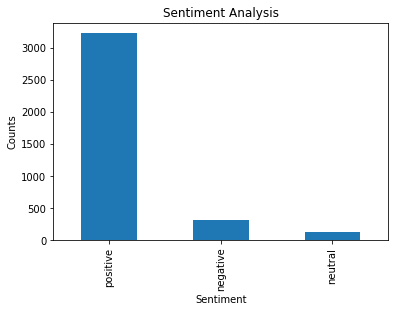

positive    3230
negative     306
neutral      130
Name: Sentiment Prediction (Original Data), dtype: int64

In [40]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
filtered_data["Sentiment Prediction (Original Data)"].value_counts().plot(kind = 'bar')
plt.show()

filtered_data["Sentiment Prediction (Original Data)"].value_counts()

We repeat the analysis with the cleaned reviews.

In [33]:
def polarity(data):
  polarity = "neutral"
  if(data['compound']>= 0.05):
    polarity = "positive"
  elif(data['compound']<= -0.05):
    polarity = "negative"
  return polarity

def predict_sentiment(text):
  data =  sentiment_analyzer.polarity_scores(text)
  return polarity(data)

# Run the predictions
filtered_data["Sentiment Prediction (Cleaned Review)"] = filtered_data["Clean Review"].apply(predict_sentiment)

filtered_data

<ipython-input-33-00a99ecdc44b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Sentiment Prediction (Cleaned Review)"] = filtered_data["Clean Review"].apply(predict_sentiment)


,ID,Review Date,Location,Hotel/Restaurant name,Review,Review Bigrams,Clean Review,Sentiment Prediction (Original Data),Sentiment Prediction (Cleaned Review)
3769,rn581240214,Reviewed yesterday,Rawai,The Family Restaurant,i have been eating here for many years and the...,"[eating many, many year, year food, food alway...",eating many year food always top quality prefe...,positive,positive
3770,rn573056196,"Reviewed April 13, 2018",Rawai,The Family Restaurant,"great prices, superb friendly service and mega...","[great price, price superb, superb friendly, f...",great price superb friendly service mega delic...,positive,positive
3771,rn572373276,"Reviewed April 10, 2018",Rawai,The Family Restaurant,we had dinner at this restaurant several times...,"[dinner restaurant, restaurant several, severa...",dinner restaurant several time food great owne...,positive,positive
3772,rn567470716,"Reviewed March 19, 2018",Rawai,The Family Restaurant,you could be in the mediterranean!!! the exper...,"[could mediterranean, mediterranean experience...",could mediterranean experience simply round ex...,positive,positive
3773,rn564981131,"Reviewed March 6, 2018",Rawai,The Family Restaurant,i have been eating here regularly for the last...,"[eating regularly, regularly last, last year, ...",eating regularly last year initially old locat...,positive,positive
...,...,...,...,...,...,...,...,...,...
52655,rn403882083,"Reviewed August 10, 2016",Patong,Patong Seafood,every time i visit phuket i used to pass by th...,"[every time, time visit, visit phuket, phuket ...",every time visit phuket used pas place dinner ...,positive,positive
52656,rn401102476,"Reviewed August 3, 2016",Patong,Patong Seafood,had my dinner last week with family. ordered f...,"[dinner last, last week, week family, family o...",dinner last week family ordered fish prawn cra...,positive,positive
52657,rn397958097,"Reviewed July 27, 2016",Patong,Patong Seafood,after 27 years of dining at patong seafood i w...,"[year dining, dining patong, patong seafood, s...",year dining patong seafood never go back party...,positive,neutral
52658,rn397866936,"Reviewed July 27, 2016",Patong,Patong Seafood,so damn over priced... we ordered a shrimp cur...,"[damn priced, priced ordered, ordered shrimp, ...",damn priced ordered shrimp curry believe asked...,negative,positive


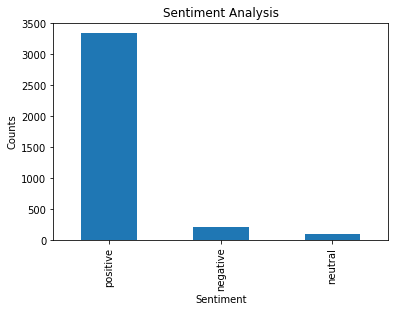

positive    3347
negative     216
neutral      103
Name: Sentiment Prediction (Cleaned Review), dtype: int64


In [39]:


plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
filtered_data["Sentiment Prediction (Cleaned Review)"].value_counts().plot(kind = 'bar')
plt.show()

print(filtered_data["Sentiment Prediction (Cleaned Review)"].value_counts())

Visualizing all the words in the tourist review dataset

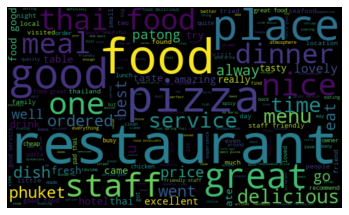

In [41]:
# Word cloud visualization.
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in filtered_data["Clean Review"]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()